# Connect to Google Drive

In [1]:
# You need to download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

ModuleNotFoundError: No module named 'google.colab'

# Load Data

In [2]:
import pandas as pd

# load data from "diabetes2.csv" file located on google drive
rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')


In [3]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Task 1: Preprocess Data

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = rawdata.drop("Outcome", axis=1, inplace=False).astype(float)
target = rawdata["Outcome"].copy()

num_pipeline = Pipeline ([
    ('std_scaler', StandardScaler())
])

data_preprocessed = num_pipeline.fit_transform(data)
target_preprocessed = target.values

# Task 2: Split Dataset for Training, Validation, and Testing

In [7]:
from sklearn.model_selection import train_test_split

train_data, temp_data, train_target, temp_target = train_test_split(data_preprocessed, target_preprocessed, test_size=0.4, random_state=42)
val_data, test_data, val_target, test_target = train_test_split(temp_data, temp_target, test_size=0.5, random_state=42)

print(train_target.shape)
print(test_target.shape)
print(val_target.shape)

(460,)
(154,)
(154,)


# Task 3: Use Logistic Regression using Scikit-learn

Logistic Regression from Scikit-learn: 
Bias:  [-0.79302711]
Weights:  [[ 0.23022922  0.99633315 -0.19857463 -0.07201953 -0.04436089  0.85422255
   0.1218909   0.39738786]]
Training log_loss using sklearn:  0.4752883284278347
Validation log_loss using sklearn:  0.47892380385180466
Testing log_loss using sklearn:  0.4906038530381513


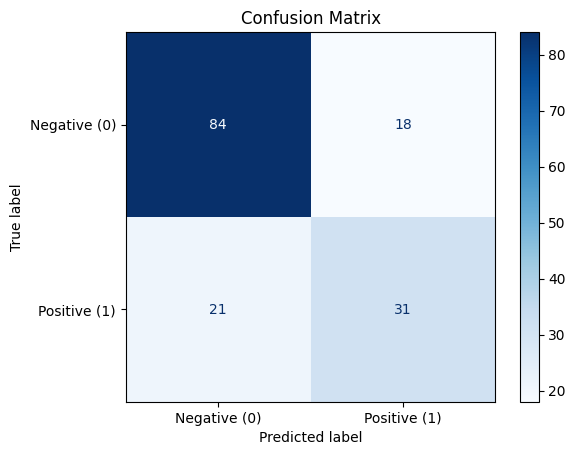

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# train the model
lr = LogisticRegression()
lr.fit(train_data, train_target)

# print the bias and weights
print("Logistic Regression from Scikit-learn: ")
print("Bias: ", lr.intercept_)
print("Weights: ", lr.coef_)

# print the log_loss errors
print("Training log_loss using sklearn: ", log_loss(train_target, lr.predict_proba(train_data)))
print("Validation log_loss using sklearn: ", log_loss(val_target, lr.predict_proba(val_data)))
print("Testing log_loss using sklearn: ", log_loss(test_target, lr.predict_proba(test_data)))

# get predictions on test dataset
test_pred = lr.predict(test_data)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_target, test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap=plt.cm.Blues)

# Show the confusion matrix plot
plt.title("Confusion Matrix")
plt.show()

# Task 4: Implement stochastic gradient descent method to perform logistic regression

Logistic Regression from SGD: 

Bias: [-0.79775049]
Weights:  [[ 0.25152051]
 [ 1.00913526]
 [-0.17242659]
 [-0.1130947 ]
 [-0.02640905]
 [ 0.8715367 ]
 [ 0.1268932 ]
 [ 0.36254751]]
Training Error:  0.3488605406535597
Validation Error:  0.476013858478927
Testing Error:  0.4925132822283009


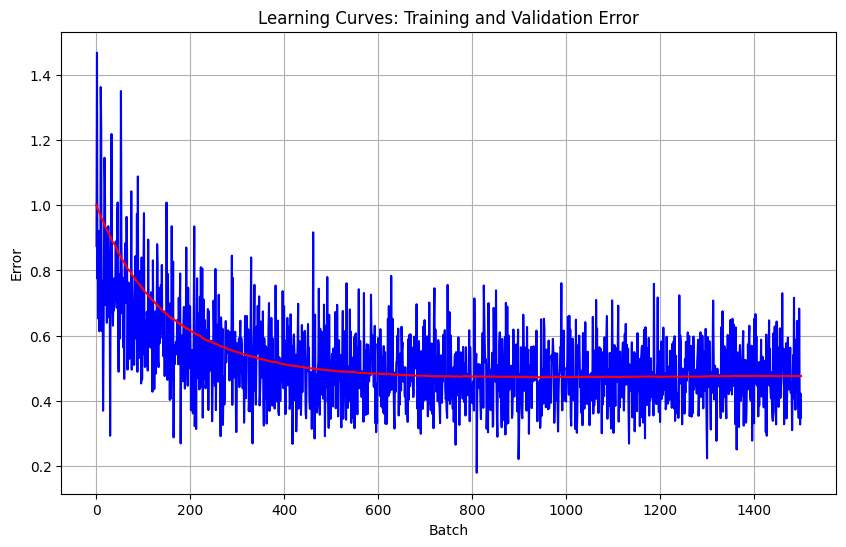

In [9]:
import numpy as np

learning_rate = 0.03
batch_size = 32
epochs = 100

# reshape target from 1D vector to 2D matrix
train_target = train_target.reshape(train_target.shape[0], 1)
val_target = val_target.reshape(val_target.shape[0], 1)
test_target = test_target.reshape(test_target.shape[0], 1)

# incorporate 1s into data (w_0)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
val_data_intercept = np.insert(val_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# logistic regression function
def myModelFunction(X, w):
  z = np.dot(X, w)
  return 1 / (1 + np.exp(-z))

# cross-entropy loss function
def myLossFunction(X, w, y):
  return -1 * np.sum((y * np.log(myModelFunction(X, w))) + ((1 - y) * (np.log(1 - myModelFunction(X, w))))) / X.shape[0]

# gradient descent
def mySGDTrainingLoop(train_data, train_target, val_data, val_target, learning_rate, batch_size, epochs):
  # set random to get constant results
  np.random.seed(42)

  # calculate number of batches per epoch
  n = train_data.shape[0]
  num_batches_per_epoch = int(np.ceil(n / batch_size))

  # store errors
  train_losses = np.zeros((num_batches_per_epoch * epochs, 1))
  val_losses = np.zeros((num_batches_per_epoch * epochs, 1))

  # initialize the weights
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  batch_counter = 0

  for epoch in range(epochs):
    # shuffle training data for each epoch
    new_order = np.random.permutation(n)
    train_data_shuffled = train_data[new_order]
    train_target_shuffled = train_target[new_order]

    for i in range(0, n, batch_size):
      train_batch = train_data_shuffled[i : i + batch_size]
      target_batch = train_target_shuffled[i : i + batch_size]

      # compute predictions
      sigmoid = myModelFunction(train_batch, w)

      # compute gradient
      grad = -1 * np.dot(train_batch.T, target_batch - sigmoid)/ train_batch.shape[0]

      # update weights
      w = w - learning_rate * grad

      # compute loss for current batch
      train_losses[batch_counter] = myLossFunction(train_batch, w, target_batch)
      val_losses[batch_counter] = myLossFunction(val_data, w, val_target)
      batch_counter += 1

  return w, train_losses, val_losses

w, train_losses, val_losses = mySGDTrainingLoop(train_data_intercept, train_target, val_data_intercept, val_target, learning_rate, batch_size, epochs)


print("Logistic Regression from SGD: \n")

# print the bias and weights
print("Bias:", w[0])
print("Weights: ", w[1:, :])

# test predictions and accuracy
test_prediction = myModelFunction(test_data_intercept, w)
test_error = myLossFunction(test_data_intercept, w, test_target)

# print errors
print("Training Error: ", train_losses[-1, 0])
print("Validation Error: ", val_losses[-1, 0])
print("Testing Error: ", test_error)

# plot the training and validation errors along batches
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label="Training Error", color="blue")
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label="Validation Error", color="red")
plt.title("Learning Curves: Training and Validation Error")
plt.xlabel("Batch")
plt.ylabel("Error")
plt.grid(True)
plt.show()



# Task 5: Create and train a logistic regression classifier in PyTorch

Logistic Regression from Pytorch: 

Bias:  -0.5407750606536865
Weights:  Parameter containing:
tensor([[-0.2187,  0.2810,  0.9510, -0.1168, -0.0457, -0.0172,  0.7122,  0.1306,
          0.3204]], requires_grad=True)
Training Error:  tensor(0.4771)
Validation Error:  tensor(0.4716)
Testing Error:  tensor(0.4871)


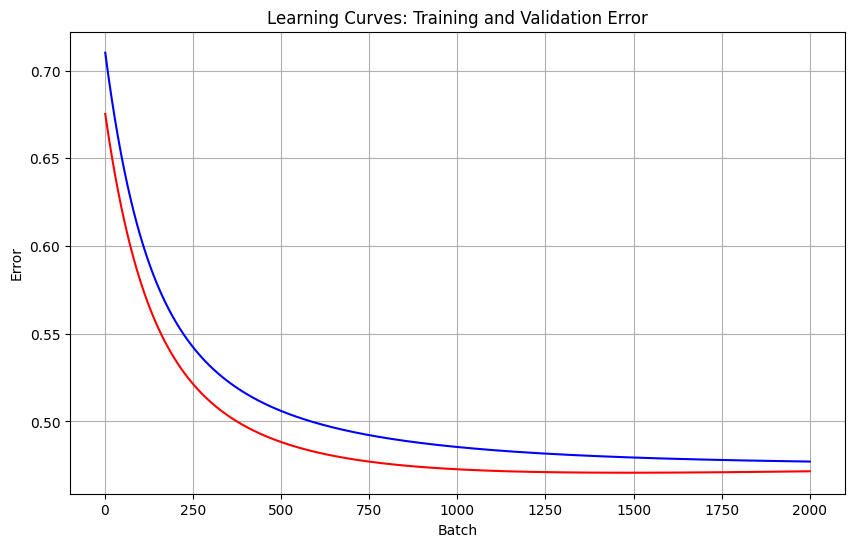

In [10]:
import torch
import torch.nn as nn

# convert numpy to tensors
train_data_tensor = torch.from_numpy(train_data_intercept).type(torch.float32)
train_target_tensor = torch.from_numpy(train_target).type(torch.float32)
val_data_tensor = torch.from_numpy(val_data_intercept).type(torch.float32)
val_target_tensor = torch.from_numpy(val_target).type(torch.float32)
test_data_tensor = torch.from_numpy(test_data_intercept).type(torch.float32)
test_target_tesnsor = torch.from_numpy(test_target).type(torch.float32)

n_samples = train_data_tensor.shape[0]
n_features = train_data_tensor.shape[1]

# logistic regression model --> sigmoid
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# loss
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
epochs = 2000
train_losses = torch.zeros(epochs, 1)
val_losses = torch.zeros(epochs, 1)

for epoch in range(epochs):
  # forward pass and loss calculation
  y_predicted_train = model(train_data_tensor)
  train_loss = criterion(y_predicted_train, train_target_tensor)
  train_losses[epoch] = train_loss.item()


  # backward pass
  train_loss.backward()

  # update bias and weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  # forward pass for validation data (no gradient needed)
  with torch.no_grad():
    y_predicted_val = model(val_data_tensor)
    val_loss = criterion(y_predicted_val, val_target_tensor)
    val_losses[epoch] = val_loss.item()

# get prediction and loss on testing data set
with torch.no_grad():
  y_predicted_test = model(test_data_tensor)
  test_loss = criterion(y_predicted_test, test_target_tesnsor)

print("Logistic Regression from Pytorch: \n")

# print bias and weights
print("Bias: ", model.linear.bias.item())
print("Weights: ", model.linear.weight)

# print errors
print("Training Error: ", train_losses[-1, -1])
print("Validation Error: ", val_losses[-1, -1])
print("Testing Error: ", test_loss)

# plot the training and validation errors along epochs
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label="Training Error", color="blue")
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label="Validation Error", color="red")
plt.title("Learning Curves: Training and Validation Error")
plt.xlabel("Batch")
plt.ylabel("Error")
plt.grid(True)
plt.show()